In [ ]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
display(df.head())
display(df.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
# Identify categorical columns (excluding the target 'survived')
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
# Remove target and related columns if they exist in the list
if 'survived' in categorical_features:
    categorical_features.remove('survived')
if 'alive' in categorical_features:
    categorical_features.remove('alive')
# Identify binary categorical columns for Label Encoding
binary_categorical_features = ['sex', 'adult_male', 'alone']
# Identify nominal categorical columns for One-Hot Encoding
nominal_categorical_features = [col for col in categorical_features if col not in binary_categorical_features]
# Apply Label Encoding to binary features
for col in binary_categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# Apply One-Hot Encoding to nominal features
df = pd.get_dummies(df, columns=nominal_categorical_features, drop_first=True)
display(df.head())


,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_Q_True,embarked_S_True,class_Second_True,class_Third_True,who_man_True,who_woman_True,embark_town_Queenstown_True,embark_town_Southampton_True
0,0,3,1,22.0,1,0,7.2500,1,no,0,False,True,False,True,True,False,False,True
1,1,1,0,38.0,1,0,71.2833,0,yes,0,False,False,False,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,0,yes,1,False,True,False,True,False,True,False,True
3,1,1,0,35.0,1,0,53.1000,0,yes,0,False,True,False,False,False,True,False,True
4,0,3,1,35.0,0,0,8.0500,1,no,1,False,True,False,True,True,False,False,True


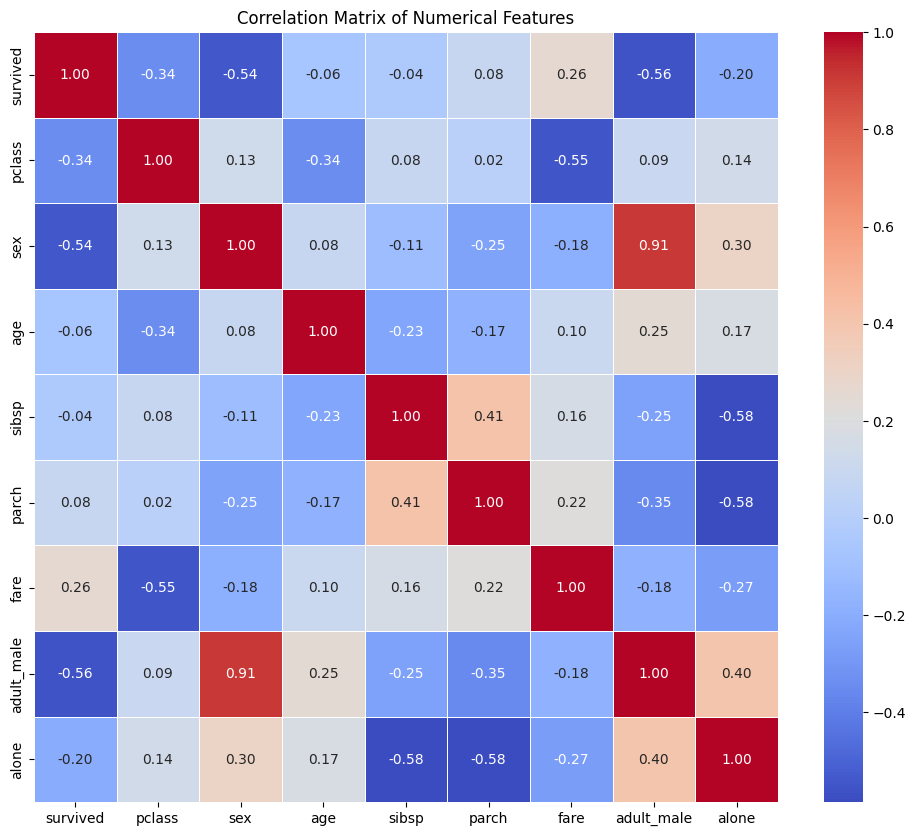

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# Separate features (X) and target (y)
X = numerical_df.drop('survived', axis=1)
y = numerical_df['survived']
# Calculate mutual information between each feature and the target
mutual_info = mutual_info_regression(X, y)
# Create a pandas Series for better visualization
mutual_info_series = pd.Series(mutual_info, index=X.columns)
# Sort the mutual information values and display
mutual_info_series.sort_values(ascending=False, inplace=True)
print("Mutual Information with 'survived':")
display(mutual_info_series)

Mutual Information with 'survived':


,0
sex,0.169874
adult_male,0.150914
fare,0.115258
pclass,0.063491
sibsp,0.029158
parch,0.025846
alone,0.013078
age,0.002691


In [ ]:
from sklearn.feature_selection import f_classif
# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)
# Create a pandas Series for better visualization
anova_results = pd.DataFrame({'F-value': f_values, 'P-value': p_values}, index=X.columns)
# Sort by F-value and display
anova_results.sort_values(by='F-value', ascending=False, inplace=True)
print("\nANOVA F-test Results with 'survived':")
display(anova_results)

NameError: name 'X' is not defined

In [ ]:
from sklearn.feature_selection import chi2
# Select only categorical columns (excluding the target 'survived')
categorical_df = df.select_dtypes(include='bool').astype(int) # Chi-squared requires non-negative values
# Separate features (X_cat) and target (y_cat)
X_cat = categorical_df
y_cat = df['survived']
# Check for negative values, Chi-squared requires non-negative
if (X_cat < 0).sum().sum() > 0:
    print("Warning: Negative values found in categorical features. Chi-squared test requires non-negative data.")
    # Handle negative values if necessary, e.g., by taking the absolute value or shifting the data
    X_cat = X_cat.abs() # Example handling: take absolute value
# Apply Chi-squared test
chi2_values, chi2_p_values = chi2(X_cat, y_cat)
# Create a pandas Series for better visualization
chi2_results = pd.DataFrame({'Chi2-value': chi2_values, 'P-value': chi2_p_values}, index=X_cat.columns)
# Sort by Chi2-value and display
chi2_results.sort_values(by='Chi2-value', ascending=False, inplace=True)
print("\nChi-squared Test Results with 'survived':")
display(chi2_results)


Chi-squared Test Results with 'survived':


,Chi2-value,P-value
who_woman,159.095048,1.783910e-36
who_man,109.859713,1.051769e-25
class_Third,41.553071,1.147141e-10
class_Second,6.160767,1.306146e-02
embark_town_Southampton,5.489205,1.913424e-02
embarked_S,5.489205,1.913424e-02
embarked_Q,0.010847,9.170520e-01
embark_town_Queenstown,0.010847,9.170520e-01


In [ ]:
import seaborn as sns
import pandas as pd
flights_df = sns.load_dataset('flights')
display(flights_df.head())
display(flights_df.info())

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


None

In [ ]:
print("\nDescriptive statistics for numerical columns:")
display(flights_df.describe())
print("\nUnique values and counts for categorical columns:")
for col in flights_df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")


Descriptive statistics for numerical columns:


,year,month,passengers,day_of_year,day_of_week,week_of_year,quarter,passengers_lag_1,passengers_lag_2,passengers_lag_3
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,143.000000,142.000000,141.000000
mean,1954.500000,6.500000,280.298611,167.708333,3.013889,26.548611,2.500000,279.237762,278.457746,277.163121
std,3.464102,3.464102,119.966317,105.439730,1.999951,15.199296,1.121936,119.708270,119.766772,119.192439
min,1949.000000,1.000000,104.000000,1.000000,0.000000,1.0,1.000000,104.000000,104.000000,104.000000
25%,1951.750000,3.750000,180.000000,83.500000,1.000000,13.0,1.750000,180.000000,180.000000,180.000000
50%,1954.500000,6.500000,265.500000,167.500000,3.000000,26.0,2.500000,264.000000,264.000000,264.000000
75%,1957.250000,9.250000,360.500000,252.250000,5.000000,40.0,3.250000,359.500000,358.250000,356.000000
max,1960.000000,12.000000,622.000000,336.000000,6.000000,53.0,4.000000,622.000000,622.000000,622.000000



Unique values and counts for categorical columns:


In [ ]:
# Combine 'year' and 'month' to create a datetime index
flights_df['date'] = pd.to_datetime(flights_df['year'].astype(str) + '-' + flights_df['month'].astype(str))
flights_df = flights_df.set_index('date')
flights_df['year'] = flights_df.index.year
flights_df['month'] = flights_df.index.month
flights_df['day_of_year'] = flights_df.index.dayofyear
flights_df['day_of_week'] = flights_df.index.dayofweek
flights_df['week_of_year'] = flights_df.index.isocalendar().week
flights_df['quarter'] = flights_df.index.quarter
display(flights_df.head())

,year,month,passengers,day_of_year,day_of_week,week_of_year,quarter
date,,,,,,,
1949-01-01,1949,1,112,1,5,53,1
1949-02-01,1949,2,118,32,1,5,1
1949-03-01,1949,3,132,60,1,9,1
1949-04-01,1949,4,129,91,4,13,2
1949-05-01,1949,5,121,121,6,17,2


In [ ]:
# Create lag features for the 'passengers' column
flights_df['passengers_lag_1'] = flights_df['passengers'].shift(1)
flights_df['passengers_lag_2'] = flights_df['passengers'].shift(2)
flights_df['passengers_lag_3'] = flights_df['passengers'].shift(3)
display(flights_df.head())

,year,month,passengers,day_of_year,day_of_week,week_of_year,quarter,passengers_lag_1,passengers_lag_2,passengers_lag_3
date,,,,,,,,,,
1949-01-01,1949,1,112,1,5,53,1,NaN,NaN,NaN
1949-02-01,1949,2,118,32,1,5,1,112.0,NaN,NaN
1949-03-01,1949,3,132,60,1,9,1,118.0,112.0,NaN
1949-04-01,1949,4,129,91,4,13,2,132.0,118.0,112.0
1949-05-01,1949,5,121,121,6,17,2,129.0,132.0,118.0
